In [1]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 6.7 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
SPIEGAZIONE CODICE

In [2]:
- Importazioni e Configurazioni di Base:
    Importa le librerie necessarie (time, bigquery, vertexai).
    Definisce l'ID del dataset BigQuery.
    Definisce l'ID della tabella del dataset
    Definisce l'ID del bucket
    Definisce la tabella Specifica su cui eseguire le Query
    
- Descrizioni dei Campi della Tabella:
    Un dizionario FIELD_DESCRIPTIONS che contiene le descrizioni dei campi della tabella per assistere nella creazione delle query.
    
- Definizioni delle Funzioni per il Modello Generativo:
    Dichiarazioni di funzioni (list_datasets_func, list_tables_func, get_table_func, sql_query_func) per interagire con BigQuery.
    
- Creazione del Tool e del Modello Generativo:
    Combina le dichiarazioni di funzioni in un tool (sql_query_tool).
    Inizializza il modello generativo con il tool definito.
    inizializzazione secondo modello generativo per l'analisi del prompt e creazione del grafico

- Definizioni di funzioni per analisi prompt e download file CSV ed excel nel bucktet
    analyze_prompt_for_graph:  Utilizza il modello LLM di Gemini per analizzare il prompt e determinare se l'utente ha richiesto un grafico. Restituisce si se è stato richiesto un grafico, altrimenti no.
    generate_graph_code_with_gemini: Utilizza Gemini per creare il codice del grafico e lo restituisce.
    export_to_csv: esporta il risultato in CSV della query sql in google cloud storage.
    export_to_excel: esporta il risultato in excel della query sql in google cloud storage.
    

- Funzione Principale main():
    Introduce l'applicazione e fornisce esempi di prompt.
    Inizializza il client BigQuery.
    Ciclo principale che ottiene input dall'utente fino a quando non inserisce 'esci'.
    Analisi Prompt per vedere se l'utente ha richiesto il grafico con analyze_prompt_for_graph
    Avvia una sessione di chat con il modello generativo e aggiunge le descrizioni dei campi al prompt.
    Invia il prompt al modello generativo e gestisce le risposte e le chiamate alle funzioni.
    Stampa i dettagli delle chiamate alle funzioni e le risposte ricevute.

- Esecuzione della Funzione main():
    Esegue la funzione main() se il file viene eseguito come script principale.
    
- Spiegazione ciclo main()
        print("SQL Talk with BigQuery - Console Version"): Stampa un'introduzione.
        print("Powered by Function Calling in Gemini"): Stampa un messaggio sulla tecnologia utilizzata.
        print("Type 'exit' to quit."): Informa l'utente su come uscire dall'applicazione.
        sample_prompts: Fornisce una lista di prompt di esempio per l'utente.

    -Inizializzazione del Client BigQuery:
        client = bigquery.Client(): Crea un'istanza del client BigQuery per interagire con il dataset.

    -Ciclo Principale per Ottenere Input dall'Utente:
        while True: Inizia un ciclo infinito.
        prompt = input("Ask me about information in the database... "): Richiede un input all'utente.
        if prompt.lower() == 'exit': Controlla se l'utente ha inserito 'exit' per uscire dal ciclo.
        print(f"User: {prompt}"): Stampa il prompt dell'utente.
    
    -Avvio di una Sessione di Chat con il Modello Generativo:
        chat = model.start_chat(): Avvia una sessione di chat con il modello generativo.
        prompt += ...: Aggiunge ulteriori istruzioni e descrizioni dei campi al prompt.
    
    -Invio del Prompt al Modello Generativo e Gestione della Risposta:
        response = chat.send_message(prompt): Invia il prompt al modello generativo e ottiene la risposta iniziale.
        response = response.candidates[0].content.parts[0]: Estrae il contenuto della risposta.
    
    -Gestione delle Chiamate alle Funzioni:
        api_requests_and_responses = []: Inizializza una lista per tenere traccia delle richieste API e delle risposte.
        function_calling_in_process = True: Imposta una variabile di controllo per il ciclo delle chiamate alle funzioni.
        while function_calling_in_process: Inizia un ciclo per gestire le chiamate alle funzioni.
        params = {}: Inizializza un dizionario per i parametri della funzione.
        for key, value in response.function_call.args.items(): Estrae i parametri dalla chiamata alla funzione.
    
    -Gestione delle Diverse Chiamate alle Funzioni:
        if response.function_call.name == "list_datasets": Gestisce la chiamata per elencare i dataset.
        if response.function_call.name == "list_tables": Gestisce la chiamata per elencare le tabelle in un dataset.
        if response.function_call.name == "get_table": Gestisce la chiamata per ottenere informazioni su una tabella specifica.
            aggiunta delle descrizioni ai campi
        if response.function_call.name == "sql_query": Gestisce la chiamata per eseguire una query SQL. 
            Creazione ed esecuzione della inner_query per filtrare i dati all'utente usando una common table expression(creazione di una tabella istantanea e volatile)
            SCARICA I VARI CSV ED EXCEL SE RICHIESTO DALL'UTENTE.
        Invio della Risposta al Modello Generativo:
        response = chat.send_message(Part.from_function_response(...)): Invia la risposta del server BigQuery al modello generativo.
        response = response.candidates[0].content.parts[0]: Estrae la nuova risposta del modello generativo.
    
    -Stampa dei Dettagli delle Chiamate alle Funzioni:
        print(f"Function call:\n - Function name: {api_requests_and_responses[-1][0]}"): Stampa i dettagli dell'ultima chiamata alla funzione.
        print(f" - Function parameters: {api_requests_and_responses[-1][1]}") Stampa i parametri dell'ultima chiamata alla funzione.
        print(f" - API response: {api_requests_and_responses[-1][2]}"): Stampa la risposta dell'API dell'ultima chiamata alla funzione.
    
    -Stampa della Risposta Finale:
        full_response = response.text: Estrae il testo della risposta finale.
        print("Assistant:", full_response): Stampa la risposta finale dell'assistente.
    
    -Salvataggio chat history che verràa pulita ad ogni nuvo avvio
        chat_history.append(f"Utente: {prompt}"):storia della chat dell'utente
        chat_history.append(f"Assistant: {full_response}").storia della chat dell'assistant
        
-Esecuzione della Funzione main():
    if __name__ == "__main__": main(): Esegue la funzione main() se il file viene eseguito come script principale.
    if graph_requested: se il LLM analizza il prompt e determina se l'utente ha richiesto il prompt. se è cosi chiama la funzione generate_graph_code_with_gemini e genera il grafico
            


Questo codice consente di interagire con BigQuery tramite una console, utilizzando un modello generativo per facilitare la costruzione di query e fornendo descrizioni dettagliate dei campi per una maggiore precisione.

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 44)

In [ ]:
AGGIORNAMENTO: AGGIUNTA FILTRO COMPANY_ID e DATE

In [ ]:
aggiunta della Variabile company_id:
    company_id = input("Company_ID").strip(): Richiede all'utente di inserire l'ID della propria azienda all'inizio dell'esecuzione del programma. Questo ID viene memorizzato nella variabile company_id.
    
aggiunta del range delle date 
    start_date = input("Data di inizio (DD-MM-YYYY): ").strip(): data di inzio
    end_date = input("Data di fine (DD-MM-YYYY): ").strip(): data di fine
    
Conclusione
    Queste modifiche permettono di personalizzare le query SQL in base all'organizzazione dell'utente. L'ID dell'azienda e il range delle date viene richiesto all'inizio, e vengono integrate in una INNER_QUERY che crea una tabella volatile filtrata per l'esecuzioe della query 

In [ ]:
AGGIORNAMENTO: AGGIUNTA DEI PARAMETRI SCALARI PER EVITARE POSSIBILI SQL INJECTION:

In [ ]:
bigquery.ScalarQueryParameter è una classe fornita dalla libreria Google Cloud BigQuery che rappresenta un parametro scalare per una query SQL. 
Utilizzando i parametri scalari, è possibile inserire valori nella query in modo sicuro e dinamico senza concatenare le stringhe direttamente nella query SQL. 
Questo approccio previene attacchi di SQL injection e rende il codice più leggibile e mantenibile.

Sintassi
    bigquery.ScalarQueryParameter(name, type, value)
Parametri
    name: Il nome del parametro, come sarà utilizzato nella query.
    type: Il tipo di dato del parametro (es. "STRING", "INT64", "DATE").
    value: Il valore del parametro.

Utilizzando i parametri scalari, si evitano i rischi associati alla concatenazione di stringhe SQL, prevenendo così possibili attacchi di SQL injection.
Controllo del nome della funzione chiamata:

Utilizzo nel codice:
Verifica se il nome della funzione chiamata è sql_query.
Configurazione del lavoro di query:
    Crea un oggetto QueryJobConfig che include i parametri di query definiti come ScalarQueryParameter.
    I parametri sono COMPANY_ID (stringa), start_date (data) e end_date (data).
    Viene anche impostato un limite massimo di byte fatturabili (100 MB).

Pulizia della query:
    Rimuove i caratteri di escape delle nuove righe (\n) e le barre rovesciate (\) dalla query.

Aggiunta della clausola WHERE se mancante:
    Verifica se la query contiene una clausola WHERE. Se non la contiene, aggiunge WHERE 1=1, che è una condizione sempre vera e facilita l'aggiunta di ulteriori clausole AND.
    Sostituzione dei segnaposto dei parametri:
    Assicura che i segnaposto per i parametri (@COMPANY_ID, @start_date, @end_date) siano presenti nella query. 
    Non è necessario sostituire manualmente i segnaposto poiché BigQuery li riconoscerà e li sostituirà con i valori dei parametri forniti

In [ ]:
AGGIORNAMENTO: CODICE PER ESEGUIRE UN FILTRO SUI RECORD CON LAST UPDATE USANDO UNA CTE

In [ ]:
Definizione Common table expression.
    Una Common Table Expression (CTE) è una potente funzione T-SQL che semplifica la creazione di query in SQL Server. 
    Le CTE funzionano come tabelle virtuali (con record e colonne) che vengono create al volo durante l'esecuzione di una query. 
    Vengono consumate dalla query e distrutte dopo l'esecuzione della stessa.

    
Definizione della Inner Query:
    Viene definita una Common Table Expression (CTE) latest_records per filtrare i record in base all'ultimo aggiornamento (LAST_UPDATE). 
    Questa CTE seleziona tutti i campi e utilizza ROW_NUMBER() per assegnare un numero di riga a ciascun record, partizionando per ID e ordinando per LAST_UPDATE in ordine decrescente. 
    Mantiene solo i record più recenti per ogni ID.
    
Assicurare il Corretto Riferimento alla Inner Query:
    Se la query dell'utente non contiene già una clausola WHERE, viene aggiunta una condizione predefinita.
    I placeholder per i parametri (@COMPANY_ID, @start_date, @end_date) vengono sostituiti con gli effettivi valori di parametro.
    
inclusione della Inner Query nella Query Principale:
    La query principale viene modificata per utilizzare latest_records come dataset principale. 
    Se la query dell'utente non contiene FROM latest_records, sostituisce FROM sinesy4wsplatform.test_devin.Test_Devin_Multi_Company_Id con FROM latest_records.
    
La inner query e la query principale vengono combinate in una singola query finale

Rimozione dei filtri WHERE dalla query esterna:
    I filtri WHERE COMPANY_ID e DATE(DOCUMENT_DATE) vengono eseguiti solo nella inner query.
Non è necessario riapplicarli nella query esterna.

Sanitizzazione della query:
    La query fornita dall'utente viene pulita per rimuovere caratteri di escape indesiderati.

Inner query:
    La CTE latest_records viene definita per filtrare i record in base all'ultimo aggiornamento (LAST_UPDATE). Questa CTE seleziona tutti i campi e utilizza ROW_NUMBER() per assegnare un numero di riga a ciascun record, partizionando per ID e ordinando per LAST_UPDATE in ordine decrescente. Mantiene solo i record più recenti per ogni ID.

Inclusione della Inner Query nella Query Principale:
    La query principale viene modificata per utilizzare latest_records come dataset principale. Se la query dell'utente non contiene FROM latest_records, sostituisce FROM {SPECIFIC_TABLE_ID_1} con FROM latest_records.

Esecuzione della query su BigQuery:
    La query combinata viene eseguita utilizzando client.query(). I risultati vengono formattati e salvati nella lista api_requests_and_responses.
    
Questa versione del codice assicura che i filtri COMPANY_ID e DOCUMENT_DATE vengano applicati solo nella inner query, evitando ridondanze e migliorando l'efficienza dell'esecuzione della query.

In [ ]:
AGGIORNAMENTO: IMPLEMEMTAZIONE DI UNA FUNZIONE LA QUALE ANALIZZA IL PROMPT E CAPISCE SE L'UTENTE HA RICHIESTO LA CREAZIONE DI UN GRAFICO

In [ ]:
Con la funzione analyze_prompt_for_graph, Utilizzo il modello LLM di Gemini per analizzare il prompt e determinare se l'utente ha richiesto un grafico.

Verifica se l'utente ha richiesto la creazione di un grafico
Utilizza la funzione analyze_prompt_for_graph per determinare se è stato richiesto un grafico e successivamente esegue la logica appropriata.
Poi In base alla richiesta dell'utente, viene creato e mostrato il grafico utilizzando la funzione generate graph_with_code


In [ ]:
AGGIORNAMENTO: IMPLEMENTAZIONE FUNZIONE CHE CREA E IMPLEMENTA UNA FUNZIONE PER SCRIVERE IL CODICE DEL GRAFICO

In [ ]:
Con la funzione generate_graph_code_with_gemini, Utilizzo il modello LLM di gemini per scrivere il codice in phytn ed eseguirlo in maniera automatica per la creazione di grafici

Trasformo la query_result in un dataframe di pandas il quale lo passerò come argomento per la creazione del codice.
Analizza il prompt base dell'utente per capire la tipologia di grafico richiesto
Crea il codice phyton e lo esegue


In [ ]:
IMPORTANTE USO DUE MODELLI.
MODEL = atribuito alla generazione di query sql. temperatura 0
MODEL1 = atribuito alla comprensione del prompt e alla creazione del grafico. temperatura 0.8

SQL Talk con BigQuery - Console Version
Powered by Function Calling in Gemini
Scrivi 'esci' per uscire.
Sample prompts: 
    - Dimmi le vendite per negozio
    - Qual è la quantità totale venduta il 11/03/2024
    - Dimmi la quantità Totale Venduta
    - Dimmi la quantità Totale Venduta da 20524032109995
    - Articoli Venduti da CARD_BARCODE: 2000013788504
    - Data vendita 12345PANTALONE01
    - Dimmi quale è l'articolo più venduto
    - Dimmi quale è l'articolo con il prezzo unitario più alto
    - Dimmi quale è l'articolo con il prezzo unitario più basso
    - Dimmi l'importo totale delle vendite
    - Dimmi la categoria di articolo più venduta
    - Dimmi quale è l'articolo più venduto per negozio
    - Dimmi la categoria di articolo con il prezzo unitario medio più alto
    - Dimmi la categoria di articolo con il prezzo unitario medio più basso
    


Company ID:  SVIL2
Data di inizio (DD-MM-YYYY):  01-01-2024
Data di fine (DD-MM-YYYY):  01-06-2024
Chiedimi qualcosa...  Dimmi le vendite per negozio e fammi il grafico


analyze_prompt_for_graph: 

    Utente: Dimmi le vendite per negozio e fammi il grafico
    Assistant: Analizza il prompt dell'utente e rispondi solo con 'Si' se l'utente ha richiesto la creazione di un grafico, altrimenti rispondi con 'No'.
    
analyze_prompt_for_graph: 
candidates {
  content {
    role: "model"
    parts {
      text: "Si \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.07263670116662979
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.11066322773694992
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.1589561253786087
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.12116485089063644
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.1283065378665924
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0

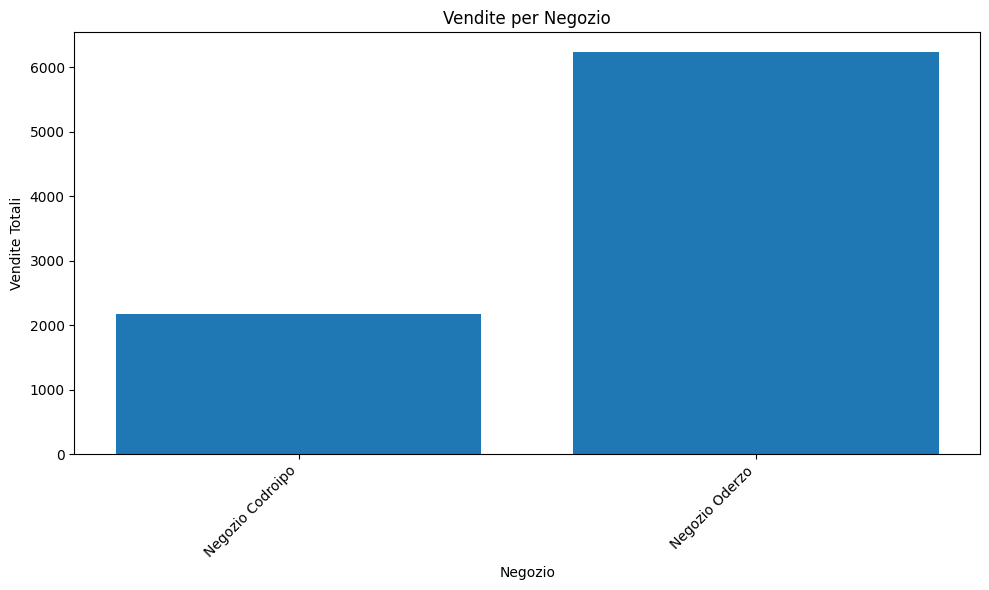

SQL TALK:
  Negozio Codroipo: 2172.00
Negozio Oderzo: 6229.14


In [ ]:
import time
import csv
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery, storage
from vertexai.generative_models import FunctionDeclaration, GenerativeModel, Part, Tool

# Set BigQuery dataset ID
BIGQUERY_DATASET_ID = "sinesy4wsplatform.test_devin"

# Imposta gli ID di due tabelle specifiche
SPECIFIC_TABLE_ID_1 = "sinesy4wsplatform.test_devin.Test_Devin_Multi_Company_Id"

# Bucket per scaricare il CSV della risposta
BUCKET_ID = "test-devin-1"

# Descrizioni dei campi della tabella
FIELD_DESCRIPTIONS = {
    "COMPANY_ID": "identifica una organizzazione (insieme di negozi)",
    "BRANCH_CODE": "il codice negozio",
    "BRANCH_DESCRIPTION": "Descrizione del negozio",
    "BRANCH_SUBTYPE": "Sottotipo negozio in base a quelli specificati nel sistema",
    "BRANCH_TYPE": "Tipo negozio",
    "BARCODE": "è una stringa che rappresenta il codice a barre univoco del Documento, se due righe hanno lo stesso BARCODE allora si riferiscono allo stesso negozio",
    "DOCUMENT_CAUSE": "Causale del documento: RETURNED indica uno scontrino di reso, RECEIPT indica uno scontrino di vendita, CANCEL indica uno scontrino di annullo",
    "DOC_NUMBER_DIGITAL": "Numero documento di vendita da catalogo (vendita in negozio ma su merce on line)",
    "CURRENCY_SYMBOL": "Simbolo della valuta del documento",
    "CURRENCY": "Valuta del documento",
    "YEAR": "Anno del documento",
    "DOCUMENT_DATE": "Data della documento/vendita",
    "CARD_BARCODE": "è una stringa che rappresenta il barcode della loyalty card del cliente fidelizzato",
    "BARCODE_13": "è una stringa che rappresenta il codice a barre del prodotto",
    "SELLER_CODE": "Codice venditore",
    "ITEM_SUB_TYPE": "è il tipo prodotto venduto: ITEM è un prodotto merceologico, DEPOSIT è un acconto, GIFTCARD è una giftcard, GOOD_PURCHASE è un buono merce",
    "ITEM_CODE": "Codice prodotto",
    "DESCRIPTION": "Descrizione prodotto",
    "QUANTITY": "Quantità venduta",
    "ROW_TOTAL": "Totale riga",
    "HIERARCHY_DESCRIPTION_LEVEL1": "Descrizione della categoria del prodotto.",
    "ID": "id che identifca un record",
    "LAST_UPDATE": "Ultima modifica"
}

# Define function declarations for the Generative Model
list_datasets_func = FunctionDeclaration(
    name="list_datasets",
    description="Get a list of datasets that will help answer the user's question",
    parameters={"type": "object", "properties": {}},
)

# Dichiarazione per ottenere un elenco di tabelle in un dataset.
list_tables_func = FunctionDeclaration(
    name="list_tables",
    description="List tables in a dataset that will help answer the user's question",
    parameters={ "type": "object", "properties": {}}
)

get_table_func = FunctionDeclaration(
    name="get_table",
    description="Get information about a table, including the description, schema, and number of rows that will help answer the user's question. Always use the fully qualified dataset and table names.",
    parameters={
        "type": "object",
        "properties": {
            "table_id": {"type": "string", "description": "Fully qualified ID of the table to get information about"}
        },
        "required": ["table_id"],
    },
)

sql_query_func = FunctionDeclaration(
    name="sql_query",
    description="Get information from data in BigQuery using SQL queries",
    parameters={
        "type": "object",
        "properties": {
            "query": {"type": "string", 
                      "description": "SQL query that will help give quantitative answers to the user's question when run on a BigQuery dataset and table. In the SQL query, always use the fully qualified dataset and table names. Don't get the query syntax wrong and always perform this function"}
        },
        "required": ["query"],
    },
)

# Combine function declarations into a tool for the Generative Model
sql_query_tool = Tool(
    function_declarations=[list_datasets_func, list_tables_func, get_table_func, sql_query_func]
    ) 

# Inizializza il modello LLM di Gemini
model = GenerativeModel(
    "gemini-1.5-flash-preview-0514",
    generation_config={"temperature": 0},
    tools=[sql_query_tool]
    )
#inizializo il modello per la creazione del grafico
model1 = GenerativeModel(
    "gemini-1.5-flash-preview-0514",
     generation_config={"temperature": 0.8}   
    )

#analizza se l'utente richeide un grafico
def analyze_prompt_for_graph(prompt):
    """
    Utilizza il modello LLM di Gemini per analizzare il prompt e determinare se l'utente ha richiesto un grafico.
    Restituisce si se è stato richiesto un grafico, altrimenti no.
    """
    # Creiamo un prompt per il modello per determinare se è stato richiesto un grafico
    analysis_prompt = f"""
    Utente: {prompt}
    Assistant: Analizza il prompt dell'utente e rispondi solo con 'Si' se l'utente ha richiesto la creazione di un grafico, altrimenti rispondi con 'No'.
    """

    # Inizializza una chat con il modello
    chat = model1.start_chat()
    # Manda il prompt al modello
    print("analyze_prompt_for_graph: ")
    print(analysis_prompt)
    response = chat.send_message(analysis_prompt)
    # Estrai la risposta dal modello
    print("analyze_prompt_for_graph: ")
    print(response)
    response_text = response.candidates[0].content.parts[0].text.strip()

    # Determina se la risposta è 'Sì'
    return response_text.lower() == "si"

#creo il codice per il grafico
def generate_graph_code_with_gemini(query_result, prompt):
    """
    Utilizza Gemini per creare il codice del grafico e lo restituisce.
    """
    # Supponiamo che il risultato della query sia una stringa JSON
    df = pd.DataFrame(query_result)
                        
    
    # Genera il prompt per Gemini
    graph_prompt = f"""
    crea SOLO IL CODICE ,in modo tale che io possa copiarlo e incollarlo su jupyter notebook togliendo tutti i simboli strani, CHE POI POSSA ESEGUIRE PER LA CREAZIONE DI UN GRAFICO APPROPRIATO IN BASE AL df che ti sto per passare e a quello che vuole l'utente.
    df= {df}
    per capire che tipologia di grafico deve rappresentare i dati ,per poi creare il codice con il grafico che li rappresenta, analizza sempre il prompt:{prompt}
    imposta una dimensione del grafico elevata e fai tutti gli accorgimenti del caso per facilitare la comprensione all'utente.
    """
    
    chat = model1.start_chat()
    response = chat.send_message(graph_prompt)
    graph_code = response.candidates[0].content.parts[0].text.strip()
    graph_code = graph_code.replace(" ```python", "").replace("```", "").replace("python","")
    
    
    print(df)
    print(graph_code)
    
    
    # Esegui il codice del grafico
    exec(graph_code)
   
   
def export_to_csv(query_result, filename):
    """esporta il risultato in CSV della query sql in google cloud storage."""
    #creo il file CSV
    with open(filename, "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=query_result[0].keys())
        writer.writeheader()
        writer.writerows(query_result)

    #Carico il csv in GCS
    client = storage.Client()
    bucket = client.bucket(BUCKET_ID)
    blob = bucket.blob(filename)
    blob.upload_from_filename(filename)

    #rimuovo il file in locale
    os.remove(filename)

    #print(f"File {filename} uploaded to {BUCKET_ID}.")

def export_to_excel(query_result, filename, file_format):
    """esporta il risultato in excel della query sql in google cloud storage."""
    # creo il dataframe dalla query risultante
    df = pd.DataFrame(query_result)
    
    # creo il file excel
    if file_format == 'xls':
        filename = filename.replace('.xlsx', '.xls')
    df.to_excel(filename, index=False, engine='openpyxl')

    # carico l'excel in GCS
    client = storage.Client()
    bucket = client.bucket(BUCKET_ID)
    blob = bucket.blob(filename)
    blob.upload_from_filename(filename)

    #rimuovo il file in locale
    os.remove(filename)

    #print(f"File {filename} uploaded to {BUCKET_ID}.")

def main():
    print("SQL Talk con BigQuery - Console Version")
    print("Powered by Function Calling in Gemini")
    print("Scrivi 'esci' per uscire.")
    
    sample_prompts = """
    - Dimmi le vendite per negozio
    - Qual è la quantità totale venduta il 11/03/2024
    - Dimmi la quantità Totale Venduta
    - Dimmi la quantità Totale Venduta da 20524032109995
    - Articoli Venduti da CARD_BARCODE: 2000013788504
    - Data vendita 12345PANTALONE01
    - Dimmi quale è l'articolo più venduto
    - Dimmi quale è l'articolo con il prezzo unitario più alto
    - Dimmi quale è l'articolo con il prezzo unitario più basso
    - Dimmi l'importo totale delle vendite
    - Dimmi la categoria di articolo più venduta
    - Dimmi quale è l'articolo più venduto per negozio
    - Dimmi la categoria di articolo con il prezzo unitario medio più alto
    - Dimmi la categoria di articolo con il prezzo unitario medio più basso
    """
    print("Sample prompts:", sample_prompts)
    
    
    # Organizzazione dal id del user
    COMPANY_ID = input("Company ID: ").strip()
    
    #Controllo se la data di inizio è mminore della data di fine se è cosi il ciclo continua altrimenti richiede le date
    while True:
        start_date = input("Data di inizio (DD-MM-YYYY): ").strip()
        if start_date.lower() == "esci":
            break
            
        end_date = input("Data di fine (DD-MM-YYYY): ").strip()
        if end_date.lower() == "esci":
            break

    
        start_date = time.strftime("%Y-%m-%d", time.strptime(start_date, "%d-%m-%Y"))
        end_date = time.strftime("%Y-%m-%d", time.strptime(end_date, "%d-%m-%Y"))
    

        if start_date > end_date:
            print("La data di inizio non può essere maggiore della data di fine. Riprova.")
        else:
            break

    #inizializzo il client big Query
    client = bigquery.Client()
    
    while True:
        
        #input dell'utente
        prompt = input("Chiedimi qualcosa... ")
        
        if prompt.lower() == 'esci':
            break
        
        # print(f"Utente: {prompt}")
        
        # Verifica se l'utente ha richiesto la creazione di un grafico
        graph_requested = analyze_prompt_for_graph(prompt)
        
        if graph_requested:
            print("L'utente ha richiesto la creazione di un grafico.")
        else:
            print("L'utente non ha richiesto la creazione di un grafico.")
        
        
        prompt += f"""
            Sei un chatbot SQL che esegue query SQL dal linguaggio naturale e grafici sulla base dei risultati della Query, NON SONO AMMESSI ERRORI E NON INVENTARE INFORMAZIONI.
            USA SEMPRE E SOLAMENTE IL DATASET FORNITO con LA VARIABILE '{BIGQUERY_DATASET_ID}', sii preciso e rispondi solo in base a quello che ti fornisce la funzione SQL_QUERY_FUNC.
            Verifica se l'utente ha richiesto l'esportazione dei dati esporta i dati nel bucket'{BUCKET_ID}'
            
            Quando dai una risposta CHIAMA SEMPRE tutte le funzioni in questo ordine: 
            1-'{list_datasets_func}'
            2-'{list_tables_func}'
            3-'{get_table_func}'
            4-'{sql_query_func}'
            OBBLIGATORIO: DEVI ESEGUIRE SEMPRE LA FUNCTION DECLARATION = '{sql_query_func}' PER RISPONDERE ALLE DOMANDE DELL'UTENTE, SOLO DOPO AVER ESEGUITO QUESTA FUNZIONE PUOI FORNIRE LA RISPOSTA
            
            ARROTONDA SEMPRE IL RISULTATO A DUE DECIMALI
            
            Se non ci sono dati per quel intervallo di date relativi ad un negozio avvisa l'utente che non ci sono dati.
            Se ti vengono chieste le informazioni riguardanti il campo DOCUMENT_DATE applica una funzione che prende in considerazione solo la data e rimuove l'ora.
            Se ti vengono chieste informazioni su un articolo utilizza l'ITEM_CODE per individuarlo.
            Se ti viene chiesta la quantità venduta di un articolo usa il campo QUANTITY per capire quante unità sono state vendute per singola riga.
            Se ti viene chiesto il valore delle vendite o l'importo totale delle vendite usa il campo ROW_TOTAL.
            Se ti vengono chieste delle informazioni riguardanti dei negozi con la sintassi, per esempio, "negozio di roma" interroga sempre il campo BRANCH_DESCRIPTION in questo modo : "Negozio Roma", togliendo il "di".
            Quando viene chiesto i dati per un negozio filtra questi dati per BRANCH_DESCRIPTION sul singolo negozio ad esempio se l'utente ti chiede: "Dimmi l'importo totale venduto del negozio di Codroipo" effettua il filtro BRANCH_DESCRIPTION = Negozio Codroipo
            Se nel input dell'utente c'è "più venduto" usa il campo QUANTITY per determinare quale è il più venduto.
            Se ti viene chiesto la "Quantita totale" usa il campo QUANTITY per interrogare il database, NON USARE QUESTA QUERY: "SELECT sum(ROW_TOTAL) FROM `sinesy4wsplatform.test_devin.Test_Devin_Multi_Company_Id`"
            Per individuare il cliente che ha acquistato fai riferimento al campo CARD_BARCODE e non includere il valore NULL.
            Quando ti viene chiesto informazioni riguardanti il cliente che ha acquistato di più, fai riferimento al campo CARD_BARCODE e non includere il valore NULL.
            Se ti viene chiesto TUTTE le date in cui è stato venduto o comprato un articolo restituisci un elenco di date interrogando il campo DOCUMENT_DATE.
            Quando ti viene chiesto "dimmi l'articolo più venduto" rispondi con il codice del prodotto e la descrizione del prodotto
            
            Se ti vengono chieste delle informazioni "per negozio" o nel prompt dell'utente son presenti più negozi devi strutturare la risposta in questo modo:
            Negozio 1: Risposta
            Negozio 2: Risposta
            
            Quando ti viene chiesto SOLO UN SINGOLO negozio restituisci la query solo su quel negozio se appartenente alla COMPANY_ID.
            Se nella query sono presenti negozi non appartenenti alla COMPANY_ID, restituisci il risultato solo sui negozi appartenenti alla COMPANY_ID specificata all'inizio.
            Assicurati che ogni query sia corretta e non contenga errori di sintassi.
            Usa sempre le descrizioni dei campi fornite per capire come strutturare la query e rispondi all'utente solo dopo aver eseguito la query per interrogare il database.
            Pulisci sempre la query rendendola interpretabile da BIG QUERY, togliendo tutti i simboli che andrebbero a creare un errore di sintassi ad esempio("\\'2024-03-25\\', \\'SVIL2\\')
            
            Ecco le descrizioni dei campi per aiutarti:
            """
        
        # Aggiungi le descrizioni per aiutare il chatbot ad eseguire la query
        for field, description in FIELD_DESCRIPTIONS.items():
            prompt += f"\n{field}: {description}"
        
        # comincia la chat
        chat = model.start_chat()
        
        # manda il prompt al chatbot e inizializza la risposta
        print("prompt: ")
        print(prompt)
        response = chat.send_message(prompt)
        print("response: ")
        print(response)
        response = response.candidates[0].content.parts[0]
        
        api_requests_and_responses = []
        
        function_calling_in_process = True
        while function_calling_in_process:
            try:
                # estrai i parametri dalle function call
                params = {}
                for key, value in response.function_call.args.items():
                    params[key] = value
                
                if response.function_call.name == "list_datasets":
                    api_response = client.list_datasets()
                    print("list_datasets:")
                    print(api_response)
                    api_response = [BIGQUERY_DATASET_ID]
                    api_requests_and_responses.append(
                        [response.function_call.name, params, api_response]
                    )
                
                if response.function_call.name == "list_tables":
                    api_response = client.list_tables(BIGQUERY_DATASET_ID)
                    print("list_tables:")
                    print(api_response)
                    api_response = [SPECIFIC_TABLE_ID_1]
                    api_requests_and_responses.append(
                        [response.function_call.name, params, api_response]  # Params è vuoto perché non ci sono parametri
                    )
          
                
                if response.function_call.name == "get_table":
                    api_response = client.get_table(params["table_id"])
                    print("get_table:")
                    print(api_response)
                    api_response = api_response.to_api_repr()
                    column_names = [column["name"] for column in api_response["schema"]["fields"]]
    
                    # Crea una lista di descrizioni dei campi utilizzando FIELD_DESCRIPTION
                    column_descriptions = [
                        f"{column_name}: {FIELD_DESCRIPTIONS.get(column_name, 'Nessuna descrizione disponibile')}"
                        for column_name in column_names
                    ]
        
                    api_requests_and_responses.append(
                        [
                            response.function_call.name,
                            params,
                            [
                                str(api_response.get("description", "")),
                                str(column_descriptions),
                            ],
                        ]
                    )
                    api_response = str(api_response)

                if response.function_call.name == "sql_query":
                    job_config = bigquery.QueryJobConfig(
                        # In questo modo, i valori dei parametri sono passati in modo sicuro alla query, proteggendo l'applicazione da potenziali vulnerabilità di SQL injection
                        query_parameters=[
                            bigquery.ScalarQueryParameter("COMPANY_ID", "STRING", COMPANY_ID),
                            bigquery.ScalarQueryParameter("start_date", "DATE", start_date),
                            bigquery.ScalarQueryParameter("end_date", "DATE", end_date),
                        ],
                        maximum_bytes_billed=100000000,
                    )
                    try:
                        # pulisci la query rendendola leggibile da big query
                        cleaned_query = params["query"].replace("\\n", " ").replace("\n", "").replace("\\", "")

                        # Inner query per filtrare i dati e ottenere solo i dati relativi agli articoli della company_ID con LAST_UPDATE più recente per ID
                        inner_query = f"""
                            WITH latest_records AS (
                                SELECT *
                                FROM (
                                    SELECT *, ROW_NUMBER() OVER (PARTITION BY ID ORDER BY LAST_UPDATE DESC) AS row_num
                                    FROM `{SPECIFIC_TABLE_ID_1}`
                                    WHERE COMPANY_ID = @COMPANY_ID 
                                    AND DATE(DOCUMENT_DATE) >= @start_date 
                                    AND DATE(DOCUMENT_DATE) <= @end_date
                                )
                                WHERE row_num = 1
                            )
                        """
                        
                        # far si che i dati relativi alla query più esterna venagno presi dalla query filtrata in precedenza
                        if "FROM latest_records" not in cleaned_query:
                            cleaned_query = cleaned_query.replace(
                                f"FROM `{SPECIFIC_TABLE_ID_1}`",
                                "FROM latest_records"
                            )

                        # Combinare le due query
                        final_query = inner_query + cleaned_query
                        print(final_query)
                        
                        # eseguire la final query
                        query_job = client.query(final_query, job_config=job_config)
                        api_response = query_job.result()
                        query_result = [dict(row) for row in api_response]
                        api_response = str(query_result)
                        api_response = api_response.replace("\\", "").replace("\n", "")
                        api_requests_and_responses.append(
                            [response.function_call.name, params, api_response]
                        )
                        
                        if "csv" in prompt or "CSV" in prompt:
                            filename = f"query_result_{int(time.time())}.csv"
                            export_to_csv(query_result, filename)
                        elif "excel" in prompt or "xlsx" in prompt:
                            filename = f"query_result_{int(time.time())}.xlsx"
                            export_to_excel(query_result, filename, "xlsx")
                        elif "xls" in prompt:
                            filename = f"query_result_{int(time.time())}.xls"
                            export_to_excel(query_result, filename, "xls")
                            
                        if graph_requested:
                            generate_graph_code_with_gemini(query_result, prompt)
                            
                    except Exception as e:
                        api_response = f"{str(e)}"
                        api_requests_and_responses.append(
                            [response.function_call.name, params, api_response]
                        )
                
                # manda la risposta della sql query all generative model che la trasformerà in linguaggio naturale
                response = chat.send_message(
                    Part.from_function_response(
                        name=response.function_call.name,
                        response={"content": api_response},
                    ),
                )
                response = response.candidates[0].content.parts[0]
                
                """
                # stampa i dettagli delle chiamate delle function
                print(f"Function call:\n   - Function name: {api_requests_and_responses[-1][0]}")
                print(f"   - Function parameters: {api_requests_and_responses[-1][1]}")
                print(f"   - API response: {api_requests_and_responses[-1][2]}")
                """
                
            except AttributeError:
                function_calling_in_process = False
        
        # Stampa la risposta finale
        full_response = response.text
        print("SQL TALK:\n ", full_response)
        

if __name__ == "__main__":
    main()
exit
